# Stats - normalised, annual

$$
z = \frac{1}{30} \displaystyle\sum_{y=1}^{30}
\left(\frac{\bar{x}_y - \bar{x}_{hist}}{\sigma_{hist}}\right)
$$

- calculate annual means (or seasonal means for each year)
- calculate the historical mean and standard deviation from the annual means
- normalise
- interannual reduction
- ensemble reduction

In [1]:
import importlib
import climag.climag as cplt
import geopandas as gpd

In [ ]:
# mask for offshore areas
ie_bbox = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="ne_10m_land_2157_IE_BBOX_DIFF",
)
# mask for non-pasture areas
mask = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="CLC_2018_MASK_PASTURE_2157_IE",
)

In [4]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

## EURO-CORDEX

In [3]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [5]:
ds_ec_norm = cplt.calc_normalised_std(ds_ec, skipna=True)

In [7]:
# get interannual mean, and then the ensemble mean
ds_ec_norm_reduced = ds_ec_norm.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

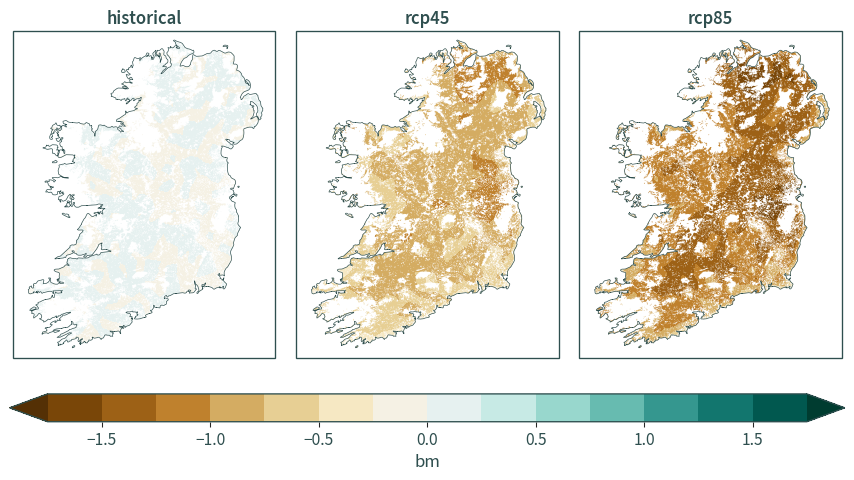

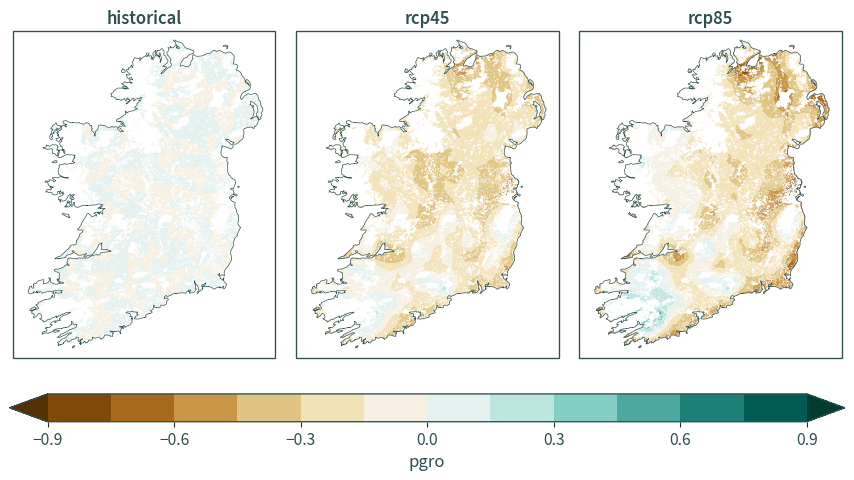

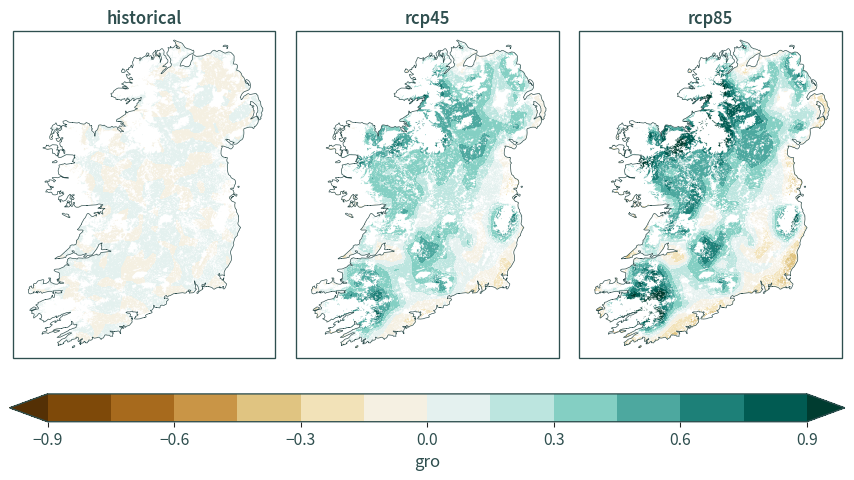

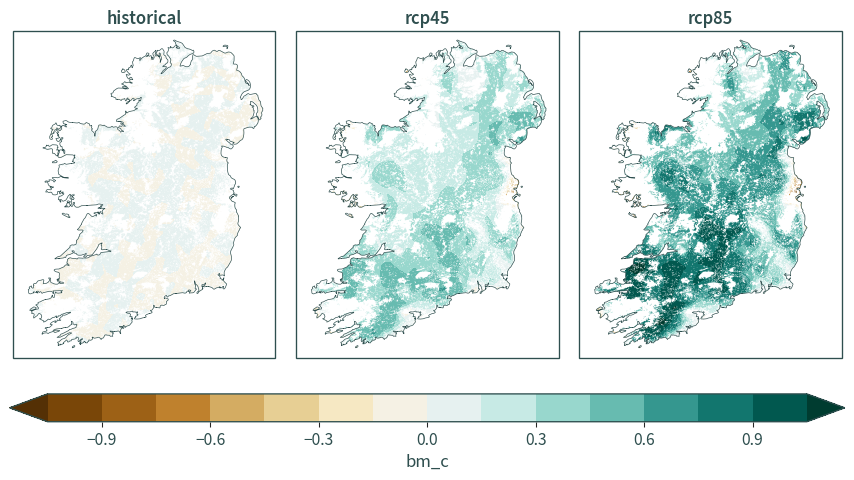

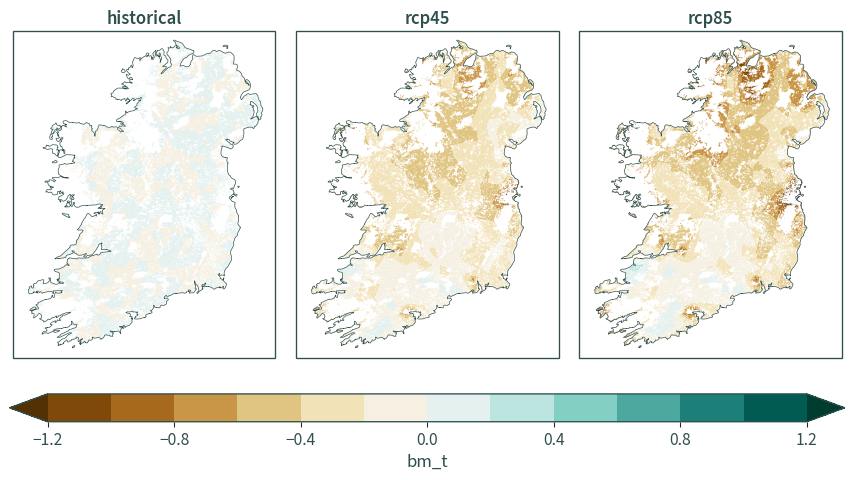

In [8]:
cplt.plot_stats(ds_ec_norm_reduced, cplt.projection_eurocordex, mask, ie_bbox)

## HiResIreland

In [3]:
ds_hr = cplt.load_all_data("HiResIreland")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [5]:
ds_hr_norm = cplt.calc_normalised_std(ds_hr, skipna=True)

In [7]:
ds_hr_norm_reduced = ds_hr_norm.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

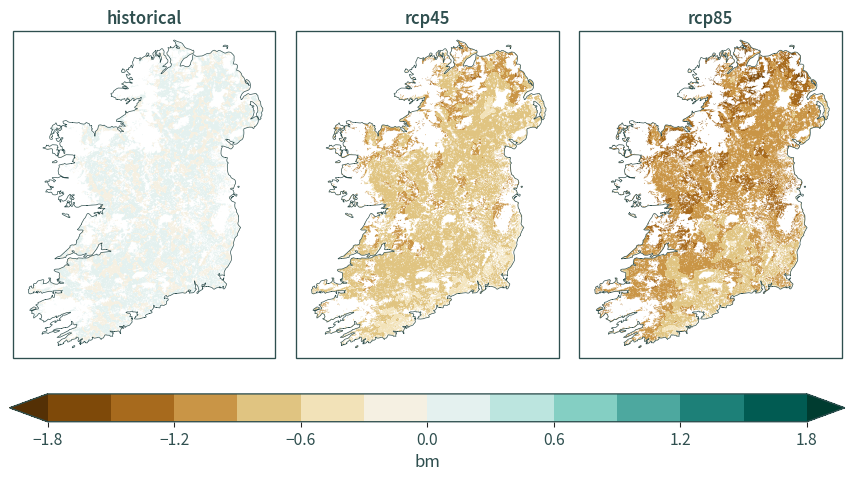

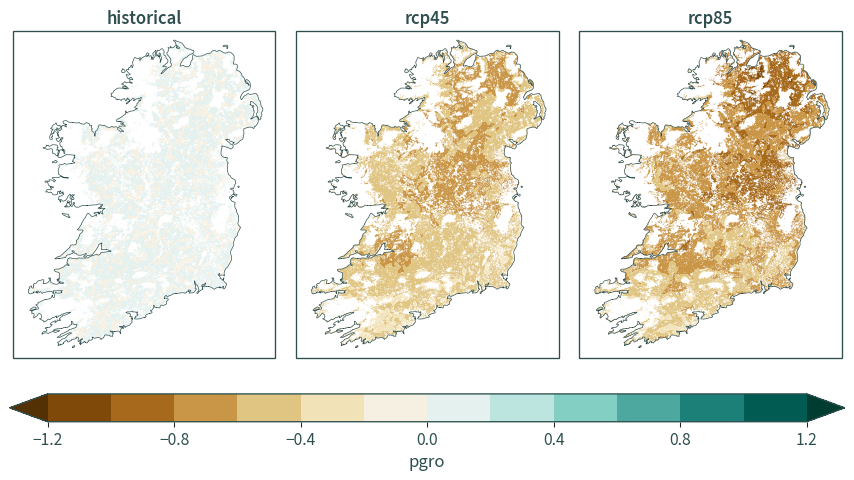

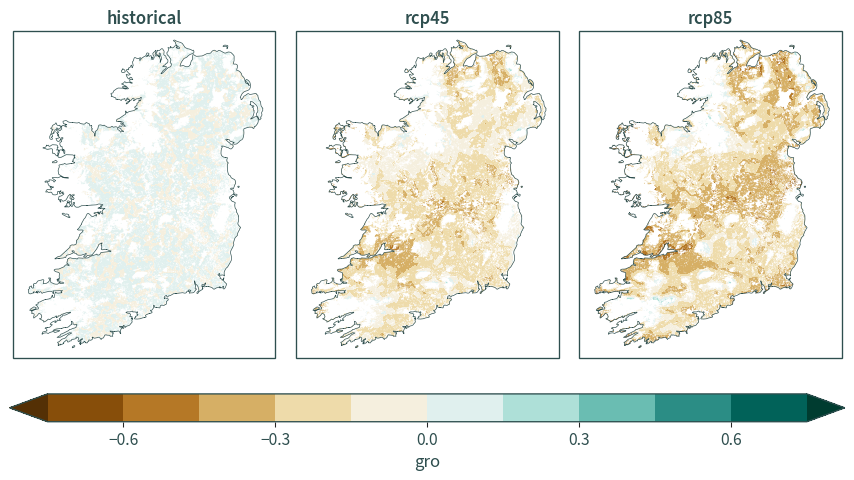

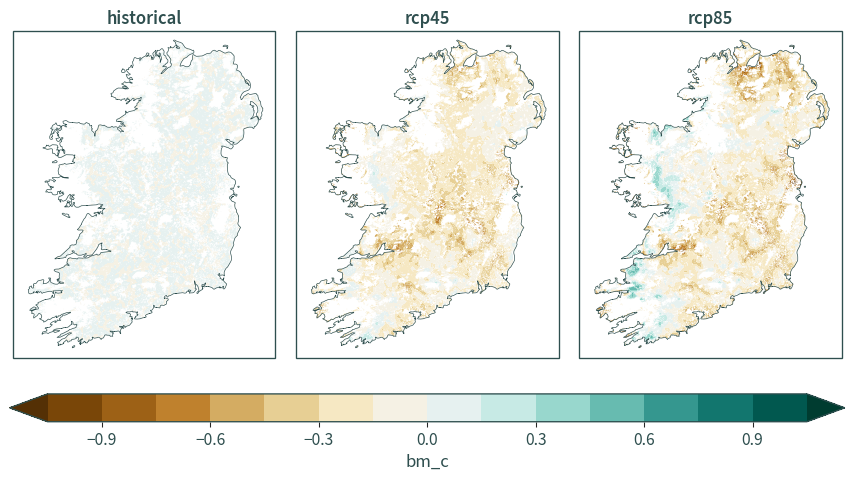

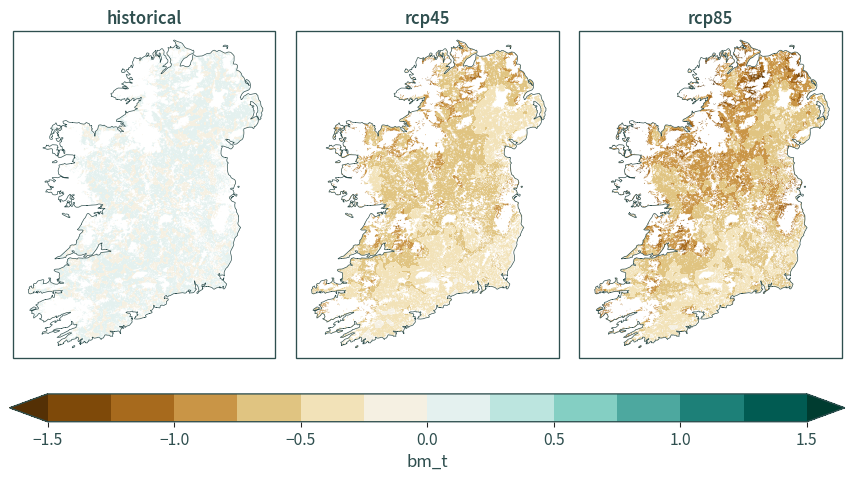

In [8]:
cplt.plot_stats(ds_hr_norm_reduced, cplt.projection_hiresireland, mask, ie_bbox)